In [2]:
import pandas as pd
import numpy as np

In [3]:
#Load Linear Regression Dataset
df=pd.read_csv('C:/Users/jasme/Desktop/USA_Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.4 KB


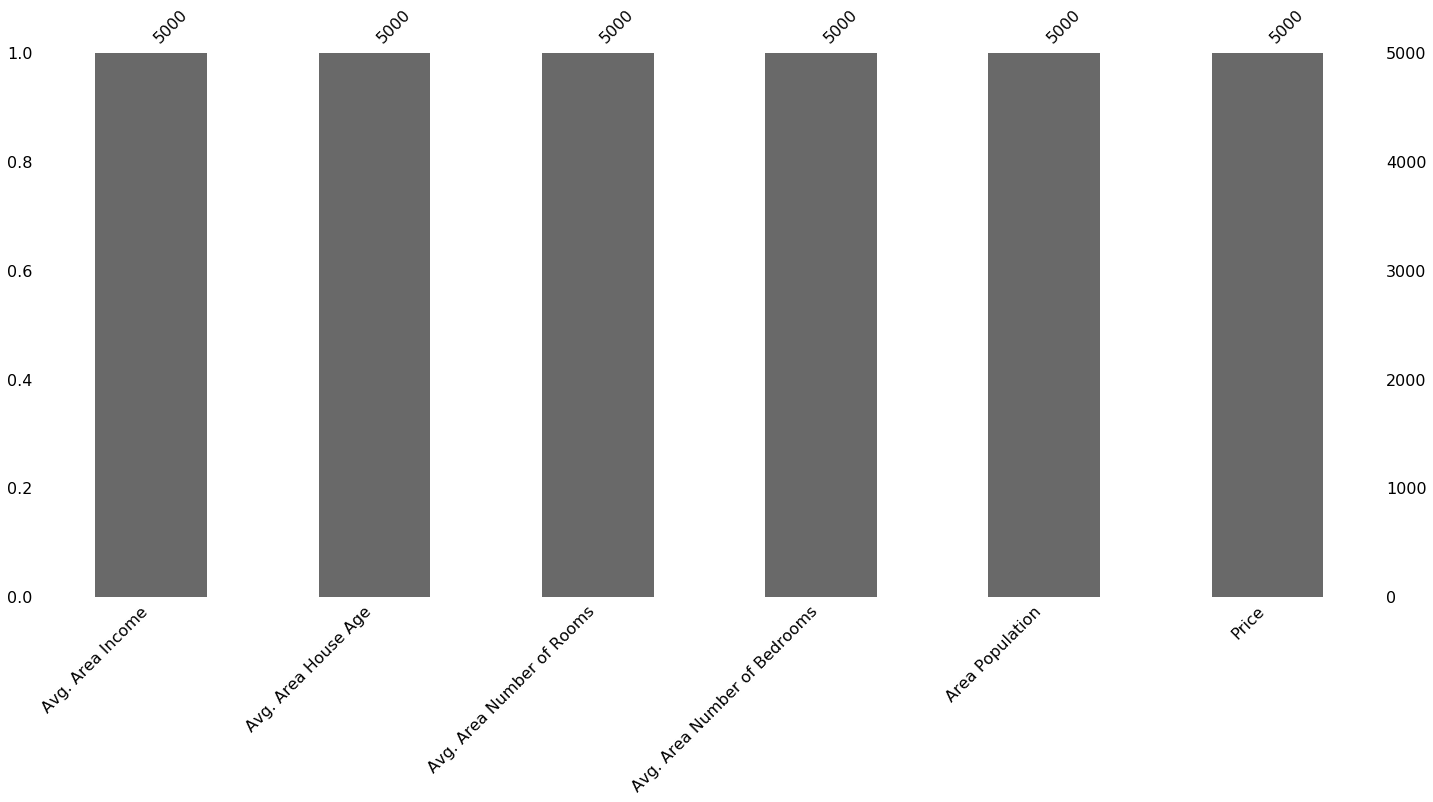

In [5]:
# Check for  missing vaulues
import missingno
missingno.bar(df)
#Each column has 5000 values; so there are no missing values

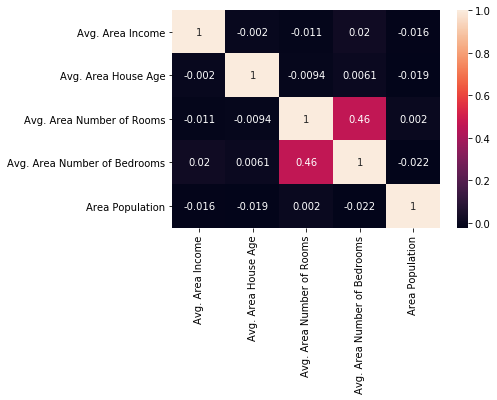

In [6]:
# Check for Feature Dependence
import seaborn as sns
sns.heatmap(df.iloc[:,:5].corr(),annot=True)
# Correlation is less than equal to 0.46 among features; so no need of 
#feature engineering

In [7]:
#Seperating input and output features
X=df.iloc[:,:5]
Y=df.iloc[:,5]

In [8]:
# Spliting into train and test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [9]:
X_train.shape

(3750, 5)

In [10]:
#Scaling the values using Standard scaler 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [11]:
# Adding a column of 1 for bias term
X_train_new=np.insert(X_train_scaled,0,1,axis=1)
X_test_new=np.insert(X_test_scaled,0,1,axis=1)


Computing optimal vale of beta matrix
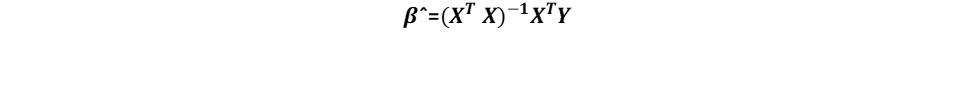

In [12]:

A=X_train_new.T.dot(X_train_new)
B=np.linalg.inv(A)
C=B.dot(X_train_new.T)
beta=C.dot(Y_train)

In [13]:
beta

array([1229751.21791635,  232765.87177277,  163412.51613686,
        120591.52466298,    2548.01575753,  151817.64417088])

In [14]:
#Predict values on test set
Y_predict=X_test_new.dot(beta)

In [15]:
Y_predict.shape

(1250,)

Computing R2 Score
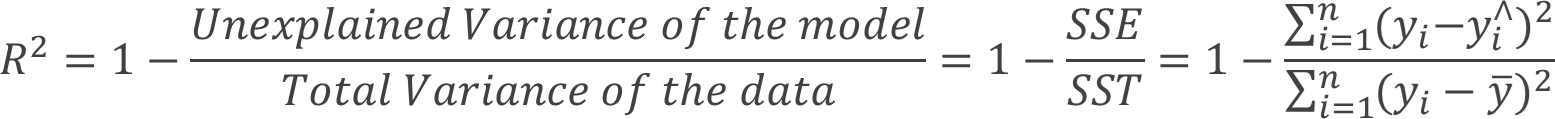


In [16]:
error=Y_test-Y_predict
sse=np.sum(error**2)
sse

12426195174108.873

In [17]:
sst=np.sum(((Y_test-np.mean(Y_test))**2))
r2_score=1-sse/sst
r2_score

0.9169678829400092

Using inbuilt function

In [18]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train_scaled,Y_train)

In [19]:
lr.coef_

array([232765.87177277, 163412.51613686, 120591.52466298,   2548.01575753,
       151817.64417088])

In [20]:
Y_predict1=model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict1)

0.9169678829400092